# Exercício Empírico 02

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('crest')
plt.style.use(['seaborn-paper'])

> A questão de interesse é verificar se maus hábitos (consumo de refrigerante, horas passadas na frente da televisão e quantidade de cigarros fumada) explicam o peso dos indivíduos. Para tanto vocês terão à disposição a base da Pesquisa Nacional de Saúde (PNS) de 2013, elaborada pelo IBGE.
> 
> Todo trabalho empírico, antes de apresentar os resultados econométricos, deve apresentar algumas estatísticas descritivas.
> 
> Assim, você deve inicialmente calcular as estatísticas descritivas (média, desvio-padrão, máximo, mínimo, quantidade), por status de fumante (fumante diário, fumante ocasional e não fumante) para as variáveis que serão utilizadas na primeira regressão múltipla que você vai estimar (equação abaixo):
> 
> $$peso_g = \beta_0 + \beta_1 refrigerante_i + \beta_2 TV_i + \beta_3 cigarro_i + u_i$$
> 
> Em que peso_g é o peso do indivíduo em gramas, TV é a quantidade de horas diárias gastas assistindo televisão e cigarro é a quantidade de cigarros consumida por dia. A variável cigarro assume o valor 0 para os indivíduos que não fumam.
> 
> Comente essas estatísticas descritivas.
> 
> Estime, então, essa regressão. Interprete e comente os resultados.
> 
> Reestime a equação, com a variável dependente em log, assim como a variável cigarro. Interprete os resultados e compare com os obtidos do modelo com as variáveis em nível.
>
> $$log(peso_g) = \beta_0 + \beta_1 refrigerante_i + \beta_2 TV_i + \beta_3 log(cigarro_i) + u_i$$
>
> Que outra variável (variáveis) que faz (fazem) parte da PNS 2013 você poderia adicionar ao modelo? Reestime o modelo incluindo esta variável ou variáveis. Interprete e comente os resultados. A partir daqui você está por conta própria e deve usar seus conhecimentos de Economia e de Econometria.
> 
> O trabalho deve ter 3 páginas e ser entregue no dia 16/06.

***

## Teoria Econômica

Nesta seção, escrevemos a teoria econômica (artigos, livros, publicações etc) que embasam a nossa análise. Comece fazendo uma introdução do tema e depois uma breve revisão literatura teórica e empírica do seu tema de pesquisa. Além disso, aqui também devem ir as hipóteses que testaremos na parte de [Inferência Estatística](#inferência-estatística).

***

## Descrição dos Dados

Nesta seção devem ir as informações de:

- Tipos dos dados de forma geral (dados de cross-section, painel, etc) e 'metadados' deles.
- Tipos computacionais dos campos da base.
- Visualização simples da base (`df.head()`).
- Comentários sobre valores únicos e valores faltantes.

In [2]:
df = pd.read_stata('dados/dados_ex_empirico_2.dta')
df.head()

,v0001,c006,c00701,c00702,c00703,c008,c009,c010,c011,d001,p020,p022,p045,p050,p05402,w00103,w00203,v0022
0,11,1,29,12,1977,35,2,1.0,1.0,2.0,3.0,2.0,3.0,3.0,NaN,59.500000,162.0,4
1,11,2,0,20,37,37,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,11,2,18,1,2013,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,11,2,0,20,16,16,1,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,11,1,7,11,1970,42,4,1.0,1.0,1.0,4.0,2.0,3.0,3.0,NaN,81.199997,169.0,2


In [13]:
cod = list(df.columns)

trad = ['Estado da Federação', 'Sexo', 'Dia de Nascimento ', 'Mês de Nascimento', 'Ano de Nascimento', 'Idade', 'Cor ou Raça', 
    'Vive Acompanhado', 'Estado Civil', 'Alfabetizado', 'Quantidade de Dias que Consome Refrigerante', 
    'Quantidade de Refrigerante Consumida', 'Horas assistindo TV', 'Fumante', 'Quantidad de Cigarro/Dia', 'Peso (kg)',
    'Altura (cm)', '']

dicio = pd.DataFrame({'Código': cod, 'Significado': trad})
dicio

,Código,Significado
0,v0001,Estado da Federação
1,c006,Sexo
2,c00701,Dia de Nascimento
3,c00702,Mês de Nascimento
4,c00703,Ano de Nascimento
5,c008,Idade
6,c009,Cor ou Raça
7,c010,Vive Acompanhado
8,c011,Estado Civil
9,d001,Alfabetizado


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205546 entries, 0 to 205545
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   v0001   205546 non-null  int8   
 1   c006    205546 non-null  int8   
 2   c00701  205546 non-null  int8   
 3   c00702  205546 non-null  int8   
 4   c00703  205546 non-null  int16  
 5   c008    205546 non-null  int16  
 6   c009    205546 non-null  int8   
 7   c010    175214 non-null  float64
 8   c011    175214 non-null  float64
 9   d001    191097 non-null  float64
 10  p020    60202 non-null   float64
 11  p022    41462 non-null   float64
 12  p045    60202 non-null   float64
 13  p050    60202 non-null   float64
 14  p05402  6110 non-null    float64
 15  w00103  59402 non-null   float32
 16  w00203  59402 non-null   float32
 17  v0022   205546 non-null  int8   
dtypes: float32(2), float64(8), int16(2), int8(6)
memory usage: 17.6 MB


In [10]:
df.describe().round(2)

,v0001,c006,c00701,c00702,c00703,c008,c009,c010,c011,d001,p020,p022,p045,p050,p05402,w00103,w00203,v0022
count,205546.00,205546.00,205546.00,205546.00,205546.00,205546.00,205546.00,175214.0,175214.00,191097.0,60202.00,41462.00,60202.00,60202.00,6110.00,59402.00,59402.00,205546.00
mean,29.04,1.52,14.36,7.45,1843.77,32.28,2.69,1.5,3.49,1.1,2.35,1.71,3.25,2.73,12.88,70.40,163.04,4.03
std,12.12,0.50,9.36,4.76,497.74,20.65,1.43,0.5,1.85,0.3,2.44,0.74,1.92,0.66,9.92,15.22,9.74,1.88
min,11.00,1.00,0.00,1.00,0.00,0.00,1.00,1.0,1.00,1.0,0.00,1.00,1.00,1.00,1.00,30.00,125.00,1.00
25%,21.00,1.00,6.00,4.00,1961.00,15.00,1.00,1.0,1.00,1.0,0.00,1.00,2.00,3.00,5.00,59.70,156.00,3.00
50%,28.00,2.00,14.00,7.00,1980.00,30.00,4.00,1.0,5.00,1.0,2.00,2.00,3.00,3.00,10.00,68.60,162.80,4.00
75%,35.00,2.00,22.00,10.00,1996.00,47.00,4.00,2.0,5.00,1.0,4.00,2.00,4.00,3.00,20.00,79.20,170.00,5.00
max,53.00,2.00,31.00,20.00,2013.00,109.00,9.00,2.0,5.00,2.0,7.00,3.00,8.00,3.00,80.00,179.00,203.00,22.00


In [17]:
df.pivot_table(index='p050', aggfunc='count')

,c006,c00701,c00702,c00703,c008,c009,c010,c011,d001,p020,p022,p045,p05402,v0001,v0022,w00103,w00203
p050,,,,,,,,,,,,,,,,,
1.0,7334,7334,7334,7334,7334,7334,7334,7334,7334,7334,5100,7334,5663,7334,7334,7303,7303
2.0,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1053,1395,447,1395,1395,1383,1383
3.0,51473,51473,51473,51473,51473,51473,51473,51473,51473,51473,35309,51473,0,51473,51473,50716,50716


***

## Análise Exploratória

Nesta seção olhamos as características básicas da nossa base de dados. Tais como:

- Medidas de tendência central, como ***médias (aritimética, ponderada, harmônica e geométrica), mediana e moda***.
- Medidas de dispersão, como ***range, variância, desvio e desvio-padrão***.
- Comentários sobre a ***distribuição*** dos valores das variáveis.
- Medidas de associação entre variáveis, como a ***correlação*** e seus diferentes tipos.
- Aqui também é útil fazer uso intensivo de gráficos. Alguns exemplos dos que podem ser utilizados são:
  - Histogramas
  - Gráficos de barras/linhas/pizza
  - Boxplots
  - Gráficos de dispersão
  - Pair plots
  - Heatmaps, etc

In [ ]:
# Quebra de informações a partir da frequência de fumo
    # Idade
    # Consumo de refrigerante
    # Sexo e Raça
    # Quantidade de horas assistindo TV
    # Estado Civil e Vive Acompanhado

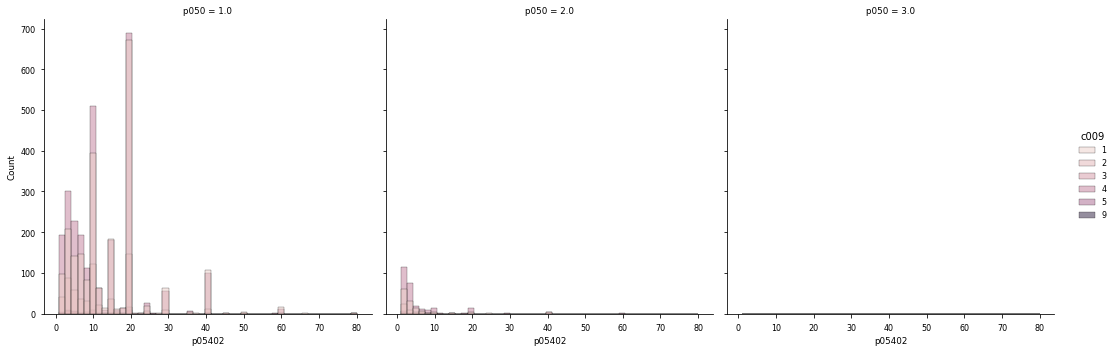

In [7]:
sns.displot(data=df, x="p05402", col="p050", hue="c009")

***

## Tratamento dos Dados

Antes de passarmos para a estimação dos modelos de regressão, é necessário tratar os dados da base. Para isso, seguimos os seguintes passos:

- Remover dados faltantes.
- Normalizar (deixar entre 0 e 1), padronizar ou aplicar $logs$ nos dados contínuos. Esse passo depende diretamente do que será feito na etapa de estimação, nem todos os modelos dependem desse tratamento.

In [24]:
# https://stackoverflow.com/questions/64671316/convert-numerical-data-to-categorical-in-python
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans

d_p050 = {1: 'diariamente', 2: 'menos que diariamente', 3: 'não fumo atualmente'}  
df['p050'] = df['p050'].map(d_p050).fillna(df['p050'])

d_c006 = {1: 'masculino', 2: 'feminino'}
df['c006'] = df['c006'].map(d_c006).fillna(df['c006'])

d_c009 = {1: 'branca', 2: 'preta', 3: 'amarela', 4: 'parda', 5: 'indigena', 9: 'ignorado'}
df['c009'] = df['c009'].map(d_c009).fillna(df['c009'])

d_c010 = {1: 'vive acompanhado', 2: 'nao vive acompanhado'}
df['c010'] = df['c010'].map(d_c010).fillna(df['c010'])

d_c011 = {1: 'casado(a)', 2: 'separado(a) ou desquitado(a) judicialmente', 3: 'divorciado(a)', 4: 'viuvo(a)', 5: 'solteiro(a)'}
df['c011'] = df['c011'].map(d_c011).fillna('nao aplicavel')

d_d001 = {1: 'alfabetizado', 2: 'nao alfabetizado'}
df['d001'] = df['d001'].map(d_d001).fillna('nao aplicavel')

df.head()

,v0001,c006,c00701,c00702,c00703,c008,c009,c010,c011,d001,p020,p022,p045,p050,p05402,w00103,w00203,v0022
0,11,masculino,29,12,1977,35,preta,vive acompanhado,nao aplicavel,nao aplicavel,3.0,2.0,3.0,não fumo atualmente,NaN,59.500000,162.0,4
1,11,feminino,0,20,37,37,branca,vive acompanhado,nao aplicavel,nao aplicavel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,11,feminino,18,1,2013,0,parda,NaN,nao aplicavel,nao aplicavel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,11,feminino,0,20,16,16,branca,nao vive acompanhado,nao aplicavel,nao aplicavel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,11,masculino,7,11,1970,42,parda,vive acompanhado,nao aplicavel,nao aplicavel,4.0,2.0,3.0,não fumo atualmente,NaN,81.199997,169.0,2


In [ ]:
# idade com retornos decrescentes
# transformar estado civil em dummy
# iteração entre vive acompanhado e estado civil (pode nao ser casado, mas se vive acompanhado a dinamica eh a mesma quase)
# iteração entre p020 e p022 para mostrar o consumo total de refrigerante

***

## Modelos de Regressão

Essa etapa é uma das mais simples e envolve bastante escrita. Nela, nós:

- Estimamos alguns modelos de regressão linear (simples ou múltipla, com mais ou menos variáveis).
- Interpretamos os resultados. Aqui, é interessante ter o seguinte texto em mente:

> ***Extraído do livro Econometria Básica, cap. 05, Gujarati e Porter***.
> 
> Voltemos ao Exemplo 3.2 sobre despesas com alimentos na Índia. Usando os dados fornecidos na Equação (3.7.2) e adotando o formato da Equação (5.11.1), obtemos a seguinte equação de despesas:
> 
> $$ \hat{\text{DespAlimentação}}_i = 94,2087 + 0,4368 \text{TotalExp}_i$$ 
> $$ep = (50,8563) (0,0783)$$
> $$t = (1,8524) (5,5770)$$
> $$p = (0,0695) (0,0000)*$$
> $$r^2 = 0,3698 \text{ ; } gl = 53$$
> $$F_{1, 53} = 31,1034 (\text{valor p} = 0,0000)*$$
> 
> em que “*” denota extremamente pequeno.
>
>   Primeiro, vamos interpretar a regressão. Como esperado, existe uma relação positiva entre despesas com alimentos e despesa total. Se a despesa total aumentar em uma rupia, em média, a despesa com alimentação aumentará em cerca de 44 países. Se a despesa total for zero, em média a despesa com alimentação será de 94 rupias. Obviamente, essa interpretação mecânica do intercepto pode não fazer muito sentido econômico. O valor de $r^2$, cerca de
0,37, significa que 37% da variação na despesa com alimentos é explicada pela despesa total, uma proxy para a renda.
>
>   Suponha que queiramos testar a hipótese nula de que não há relação entre despesa com alimentação e despesa total, que o coeficiente angular verdadeiro $\beta_2 = 0$. O valor estimado de $\beta_2$ é 0,4368. Se a hipótese nula fosse verdadeira, qual seria a probabilidade de obter um valor de 0,4368? Sob a hipótese nula, observamos na Equação (5.12.2) que o valor *t* é 5,5770 e o valor *p* de obter esse valor *t* é praticamente igual a zero. Em outras palavras, podemos rejeitar totalmente a hipótese nula. Mas suponha que a hipótese nula seja $\beta_2 = 0,5$. E agora? Recorrendo ao teste *t*, obtemos:
> 
> $$t = \frac{0,4368 - 0,5}{0,0783} = -0,8071$$
> 
> A probabilidade de obter um $|t|$ de 0,8071 é de mais de 20%. Portanto, não rejeitamos a hipótese de que o verdadeiro $\beta_2$ seja 0,5.
>
> Usando os resíduos estimados da regressão, o que podemos dizer sobre a distribuição de probabilidade do termo de erro? Essa informação está na Figura 5.9. Como a Figura 5.9 indica, os resíduos da regressão da despesa com alimentos parecem ter uma distribuição simétrica. A aplicação do teste Jarque-Bera mostra que a estatística *JB* é de cerca de 0,2576, e que a probabilidade de obter esse número, sob uma premissa de distribuição normal, é de cerca de 88%. Portanto, não rejeitamos a hipótese de que os termos de erro se distribuam normalmente. Mas tenha em mente que o tamanho da amostra de 55 observações pode não ser suficientemente grande.
> 
> ![](assets/2022-05-25-11-03-53.png)



- O texto acima é um bom referencial sobre como escrever uma interpretação dos resultados da regressão.
- Lembre-se de escrever um texto desses para cada um dos modelos estimados (não se preocupe com espaço, os notebooks não são a versão final). 

In [ ]:
# lembre-se de ter as variávies em mente na hora de interpretar.
# voce só sabe tratar dummies de intercepto

***

## Testes de Aderência

A ideia nesta seção é testar a distribuição dos dados e se os resultados da regressão respeitam as hipóteses do modelo de regressão linear. Tendo isso em mente, nós podemos:

- Testes da distribuição das variáveis utilizadas:
  - Teste de Ryan-Joiner 
  - Teste de Shapiro-Wilkis
  - Teste de Anderson-Darling
  - Teste de Kolmogorov-Smirnov
- Testes da distribuição dos resíduos da regressão
  - Histograma de resíduos
  - Representação da probabilidade normal
  - Teste Jarque-Bera
- Verificação de multicolinearidade no modelo
  - Gráficos de correlação e tabelas de correlação

In [ ]:
# grafico de histograma de residuos
# teste de jarque-bera

***

## Inferência Estatística

Nesta seção, iremos verificar se os parâmetros estimados na regressão são significativos do ponto de vista estatístico. Para isso, possuímos no nosso arsenal alguns testes (lembre-se, eles podem ser feitos de maneira unilateral ou bilateral) que devem ser utilizados para testar as hipóteses definidas na seção de [Teoria Econômica](#teoria-econômica):

- Teste *t*
  - Utilizado para testar o valor dos $\hat{\beta}$ da regressão.
  - Bicaudal: $H_0: \beta_1 = \beta^*_1$ e $H_1: \beta_1 \ne \beta^*_1$
  - Cauda direita: $H_0: \beta_1 \leq \beta^*_1$ e $H_1: \beta_1 > \beta^*_1$
  - Cauda esquerda: $H_0: \beta_1 \geq \beta^*_1$ e $H_1: \beta_1 < \beta^*_1$
- Teste $\chi^2$
  - Utilizado para testar a variância estimada da população ($\hat{\sigma}^2$)
- Teste F
  - Utilizado para teste se um conjunto de parâmetros estimados é diferente de 0.


In [ ]:
# teste t individual para alguns coeficientes
# teste F para o Fumante, Refrigerante